---
title: Trabalho 2
subject: Trabalho
subtitle: Utilizando o Python para problemas científicos
short_title: Trabalho 2
authors:
  - name: Wesley Cota
    affiliations:
      - Universidade Federal de Viçosa (UFV)
    orcid: 0000-0002-7859-8394
    email: wesley.cota@ufv.br
    url: https://wcota.me
#license: "All Rights Reserved"
keywords: fortran, git, python
kernelspec:
  name: python3
  display_name: "Python 3"
exports:
- format: pdf
  template: physical_review_journals
abbreviations:
  DVCS: Distributed Version Control
  CVS: Concurrent Versions System
---

# Instruções para o Trabalho 2

Utilize o botão de download acima para baixar o notebook e o execute onde preferir (Visual Studio Code, Google Colab, etc).

Envie o arquivo final com extensão `.ipynb` pelo PVANet Moodle com as células completadas.

Note que todo o notebook será executado pelo professor, de forma que tudo precisa estar funcionando para a melhor avaliação.

As células de resposta estão destacadas, e somente elas serão consideradas. Os esqueletos dos códigos são apenas de referência.

**É NECESSÁRIO COMENTAR O CÓDIGO PARA EXPLICAR O QUE ESTÁ SENDO FEITO! Utilize células em Markdown para melhorar a explicação do que está sendo feito, além dos comentários no próprio código** Cuidado com o uso de ferramentas de IA.

## Problema 1 [somente Python, sem bibliotecas externas]

Neste problema, vamos implementar o [Método de Newton–Raphson](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Newton%E2%80%93Raphson) para encontrar raízes. Esse método pode ser mais rápido que o da biseção, porém necessitamos conhecer tanto a função $f(x)$ quanto sua derivada, $f'(x)$.

:::{tip} Bibliotecas externas
A biblioteca `math` pode ser utilizada, por ser uma biblioteca intrínseca da linguagem Python.
:::

Começando com um *chute* $x_1$, e calculando os valores de $f(x_1)$ e $f'(x_1)$, uma reta $g_1(x)$ tangente à curva é traçada para obter o valor de $x_2$ para o qual a reta intercepta o eixo $x$, *i.e.*, $g_1(x_2) = 0$. Se o valor de $f(x_2)$ está próximo de 0 com uma tolerância $\epsilon$, dizemos que $x_2$ é uma aproximação para a raiz da função. Caso contrário, a ação se repete até encontrarmos um valor dentro da margem de tolerância.

Para cada valor $x_i$, a reta tangente é dada por 

$$g_i(x) = [f'(x_i)](x-x_i)+f(x_i).$$

A solução para $g_i(x_{i+1})=0$ é

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.$$

Esse processo é repetido até obtermos $|f(x_{i+1})| < \epsilon$, e a função retorna $x_{i+1}$ como a raiz de $f(x)$ com tolerância $\epsilon$. 

Imagem ilustrativa do método funcionando: 

![metodo](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

[(fonte)](https://en.wikipedia.org/wiki/File:NewtonIteration_Ani.gif)

### Item (a)

- Implemente uma função chamada `newton()` com os seguintes argumentos:

- `f`: função $f(x)$
- `df`: função derivada de $f(x)$
- `x0`: chute inicial de onde está a raiz
- `eps`: tolerância, que toma um valor padrão igual a `1e-6`.
- `n_max`: número máximo de iterações, com valor padrão igual a `100`.

Essa função deve retornar dois números, na ordem:

- O valor aproximado da raiz
- O número de iterações efetuadas para chegar nessa raiz.

Dentro da função, implemente o método de Newton–Raphson. Um esqueleto da função é apresentado abaixo, e deve ser alterado. Um `if` é necessário dentro do *loop* para que a função termine o cálculo quando o número de iterações for `n_max`.

> [!IMPORTANT] 
> **Implementação da função `newton()`**
> 
> Faça em células abaixo a implementação pedida.

In [22]:
####################################################
####################################################
####################################################
############### Problema 1, item a #################
####################################################
####################################################
####################################################

def newton(f,df,x0,eps=10**(-6),n_max=100):
  """
  A função recebe uma função matemática, sua derivada e um valor inicial e encontra uma de suas raízes
  """
  
  x = x0 # a variável x recebe seu valor inicial
  n_it = 0 # o contador de interações é zerado

  while (abs(f(x)) >= eps):
    if n_it == n_max: break
    x = x - f(x) / df(x)
    n_it = n_it + 1

  return x, n_it

### Item (b)

- Agora, chame a função `newton` para obter a raiz da função $cos(x)$, com um chute inicial ao seu critério. Note que é possível colocar diretamente a função `cos()` como argumento, mas poderá ter problema ao colocar `df`. Você pode criar as funções `f()` e `df()` ou utilizar o `lambda`, como fizemos em aula.
- Imprima a raiz obtida e quantas iterações foram necessárias.

Abaixo, um exemplo da saída com o valor da raiz e o chute inicial.

> [!IMPORTANT] 
> **Uso da função `newton()` para $cos(x)$**
> 
> Faça em células abaixo a implementação pedida.

In [23]:
####################################################
####################################################
####################################################
############### Problema 1, item b #################
####################################################
####################################################
####################################################

import math # importa o pacote math

def f(x): # define a função matemática
    return math.cos(x) # retorna a função cosseno

def df(x): # define a derivada
    return (-math.sin(x)) # a derivada do cosseno é o oposto do seno.

x0 = (math.pi / 4, -3, 4) # define uma tupla com os possíveis valores de x0

for var in x0: # percorre todos os valores da tupla x0
    x, N = newton(f,df,var) # para a função f e sua derivada df, calcula a raiz a partir do valor inicial var
    print(f"Para o chute inicial x0 = {var}, a raiz encontrada e o número de iterações foram ({x},{N})") # escreve a resposta

Para o chute inicial x0 = 0.7853981633974483, a raiz encontrada e o número de iterações foram (1.5707963393971502,3)
Para o chute inicial x0 = -3, a raiz encontrada e o número de iterações foram (4.712388980650428,4)
Para o chute inicial x0 = 4, a raiz encontrada e o número de iterações foram (4.712388980912051,3)


### Item (c)

Vamos testar esse método onde pode dar problemas. Um desses casos é quando não existe uma raiz. 

- Aplique a função `newton()` para a função $f(x) = x^2 + 2$, com chute inicial ao seu critério, com no máximo $1000$ iterações.
- Responda (utilizando `print()`): podemos considerar que o valor obtido é a raiz da função?

Um exemplo da saída está abaixo.

> [!IMPORTANT] 
> **Uso da função `newton()` para $x^2 + 2$**
> 
> Faça em células abaixo a implementação pedida.

In [24]:
####################################################
####################################################
####################################################
############### Problema 1, item c #################
####################################################
####################################################
####################################################

def f(x): # define a função f
    return (x ** 2 + 2) # retorna o valor conforme o enunciado

def df(x): # define a derivada
    return (2 * x) # a derivada de x ** 2 + 2 é 2x

N = 1000 # estabelece o número máximo de iterações

resultado = newton(f,df,3,n_max=N) # aplica a função newton para a função f e sua derivada, a partir do valor inicial 3 para no máximo N iterações

# a variável resultado é uma lista onde resultado[0] é a "raiz" e resultado[1] é o número de iterações 

print(f"Como houve {resultado[1]} iterações, há um forte indicativo de que o método falhou.")
print(f"O que confirma a falha do método é que {resultado[0]:.8f} > {10**(-6)}.")

Como houve 1000 iterações, há um forte indicativo de que o método falhou.
O que confirma a falha do método é que 1.62801242 > 1e-06.


### Item (d)

O método também pode falhar quando caímos em um intervalo assíntotico da função. Considere, por exemplo, a função $f(x) = x\exp(-x)$. Ela tem uma raiz, mas dependendo do chute podemos ir para uma região assintótica, não exatamente zero, na qual o método retorna uma pseudo raiz por conta do valor estar dentro do limite de tolerância.

- Utilize a função `newton()` com uma tolerância de $10^{-7}$ e valor padrão de limite de iterações, para a função $f(x) = x\exp(-x)$. Faça testes com pelo menos **2 chutes**, que resultem na raiz correta, e outro em um valor incorreto. O gráfico abaixo ajudará a decidir os valores.

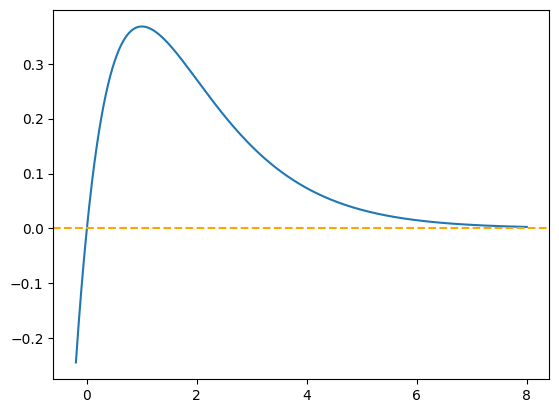

In [25]:
# NÃO USE ESTA CÉLULA!

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-0.2, 8, 1000)
y = x*np.exp(-x)

plt.plot(x, y)
plt.axhline(0, color='orange',ls='--')

> [!IMPORTANT] 
> **Uso da função `newton()` para $xe^{-x}$**
> 
> Faça em células abaixo a implementação pedida.

In [26]:
####################################################
####################################################
####################################################
############### Problema 1, item d #################
####################################################
####################################################
####################################################

def f(x): # define a função conforme o enunciado
    return (x * math.exp(-x))

def df(x): # define a derivada
    return (math.exp(-x) - x * math.exp(-x)) # a derivada de x exp (-x) é exp(-x) - x exp(-x)

for i in range (1,6,2): # estabelece um loop para os valores i em {1, 3, 5}
    var = i / 2 # estabelece um valor inicial
    resultado = newton(f,df,var,eps=10**(-7)) # calcula a raiz por meio da função newton
    print(f"Para o chute inicial x0 = {var}, a raiz encontrada e o número de iterações foram {resultado}")

Para o chute inicial x0 = 0.5, a raiz encontrada e o número de iterações foram (-9.389621148813321e-14, 6)
Para o chute inicial x0 = 1.5, a raiz encontrada e o número de iterações foram (20.104309947699292, 15)
Para o chute inicial x0 = 2.5, a raiz encontrada e o número de iterações foram (19.84810470417909, 15)


Na resolução desse item, foram utilizados valores semi inteiros, pois 1 é raiz da derivada, o que gera uma indeterminação.

Ao observar o gráfico, pode-se afirmar que os valores de $x_0 = 1.5$ e $x_0 = 2.5$ não encontram raízes reais da função.

### Item (e) 

Em muitos problemas de física, podemos encontrar as chamadas equações transcendentais, que só podem ser resolvidas numericamente. 

- Encontre a solução para 
$x = \cos(x)$
e imprima o resultado utilizando a função `print()` formatada para até 5 casas decimais, mostrando também o número de iterações necessárias para o chute inicial escolhido.

  > A saída deve ser parecida com a seguinte:
  > 
  > `A raiz é 0.73909, e o método utilizou 3 iterações.`

- Repita para pelo menos mais 3 chutes iniciais diferentes.

> [!IMPORTANT] 
> **Uso da função `newton()` para $x=\cos(x)$**
> 
> Faça em células abaixo a implementação pedida.

$x = \cos(x)$ é equivalente a $x - \cos(x) = 0$. Portanto, a solução dessa equação é raiz de:

$$f(x) = x - \cos(x).$$

In [27]:
####################################################
####################################################
####################################################
############### Problema 1, item e #################
####################################################
####################################################
####################################################

def f(x): # define a função conforme explicado acima
    return (x - math.cos(x))

def df(x): # define a derivada
    return (1 + math.sin(x)) # a derivada é 1 + sen(x)

for i in range(1,5): # executa o código abaixo para i em {1,2,3,4}
    resultado = newton(f,df,i) # aplica a função newton para a função, sua derivada e o valor inicial i
    print(f"A raiz é {resultado[0]:0.5f} e o método utilizou {resultado[1]} iterações para o chute inical {i}.")

A raiz é 0.73909 e o método utilizou 3 iterações para o chute inical 1.
A raiz é 0.73909 e o método utilizou 3 iterações para o chute inical 2.
A raiz é 0.73909 e o método utilizou 5 iterações para o chute inical 3.
A raiz é 0.73909 e o método utilizou 38 iterações para o chute inical 4.


---

## Problema 2 (Pacotes `numpy` e `matplotlib`)

Vamos construir uma matriz que mostra o potencial elétrico de partículas puntiformes em uma superfície bidimensional.

### Item (a)

Defina uma função `V` que receba como argumentos a carga `q` em uma posição `x0` e `y0`, e as posições `x` e `y`. Neste caso, assumimos que a carga `q` está na posição `x0` e `y0`, e queremos calcular o potencial em `x` e `y`.

Vamos assumir a seguinte forma para o potencial na posição $\vec{r} = (x,y)$ devido a uma carga $q$ na posição $\vec{r}_0 = (x_0,y_0)$:

$$V(\vec{\mathcal{r}}) = \frac{q}{|\vec{r}-\vec{r}_0|}$$

*Dicas:*

- Caso utilize a função `sqrt`, utilize a do NumPy com `np.sqrt()`!
- Teste a função com `V(10,2,4,3,5)`, que deve retornar o valor `7.071067811865475`.

> [!IMPORTANT] 
> **Definição da função `V()`**
> 
> Faça em células abaixo a implementação pedida.

In [ ]:
####################################################
####################################################
####################################################
############### Problema 2, item a #################
####################################################
####################################################
####################################################

import numpy as np

def V(q,x0,y0,x,y):
  denominador = np.sqrt((x-x0)**2 + (y-y0)**2)
  return (q / denominador)
V(10,2,4,3,5)

SyntaxError: invalid syntax (4146824309.py, line 12)

### Item (b)

Crie uma lista de partículas chamada `cargas` contendo tuplas `(q,x0,y0)`. Adicione 5 partículas com as seguintes cargas e posições:

- $q = 1$, em $(x_0,y_0) = (5,5)$
- $q = -1$, em $(x_0,y_0) = (-5,10)$
- $q = -1$, em $(x_0,y_0) = (0,0)$
- $q = 1$, em $(x_0,y_0) = (-5,-5)$
- $q = 2$, em $(x_0,y_0) = (20,-20)$

> [!IMPORTANT] 
> **Criação de cargas**
> 
> Faça em células abaixo a implementação pedida.

In [ ]:
####################################################
####################################################
####################################################
############### Problema 2, item b #################
####################################################
####################################################
####################################################

cargas = []
cargas.append()
...
cargas

[(1, 5, 5), (-1, -5, 10), (-1, 0, 0), (1, -5, -5), (5, 15, -15)]

### Item (c) 

Agora vamos criar um sistema de coordenadas utilizando `np.meshgrid()`. As coordenadas $x$ e $y$ devem varrer o espaço entre $-20$ e $20$, com 500 pontos cada. Utilize a função `np.linspace()` para isso.

Depois, crie as variáveis `xc` e `yc` com `np.meshgrid(x,y)`.

> [!IMPORTANT] 
> **Definição do grid**
> 
> Faça em células abaixo a implementação pedida.

In [ ]:
####################################################
####################################################
####################################################
############### Problema 2, item c #################
####################################################
####################################################
####################################################

x = np.linspace(...)
y = ...

xc, yc = np.meshgrid(...)
xc, yc

(array([[-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ],
        [-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ],
        [-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ],
        ...,
        [-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ],
        [-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ],
        [-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ]]),
 array([[-20.        , -20.        , -20.        , ..., -20.        ,
         -20.        , -20.        ],
        [-19.91983968, -19.91983968, -19.91983968, ..., -19.91983968,
         -19.91983968, -19.91983968],
        [-19.83967936, -19.83967936, -19.83967936, ..., -19.83967936,
         -19.83967936, -19.83967936],
        ...,


### Item (d)

Vamos agora calcular o potencial total devido às cinco cargas adicionadas anteriormente.

Para isso, faça um loop para cada `carga` em `cargas` e calcule o potencial resultante fornecendo as propriedades da carga e os eixos x e y dados pelo `np.meshgrid()`. Por exemplo, para calcular o potencial devido a cada carga utilizamos:

```python
for carga in cargas:
  potencial = V(*carga, x=xc, y=yc)
```

Crie uma `ndarray` vazia (com `np.zeros()`) chamada `potencial_total` de tamanho $500 \times 500$, ou seja, o mesmo *shape* de `xc` e `yc`. Repetindo o loop acima, calcule o potencial total e execute a função `mostrar_potencial(x,y,potencial_total)`.

> [!IMPORTANT] 
> **Definição do potencial no grid**
> 
> Faça em células abaixo a implementação pedida.

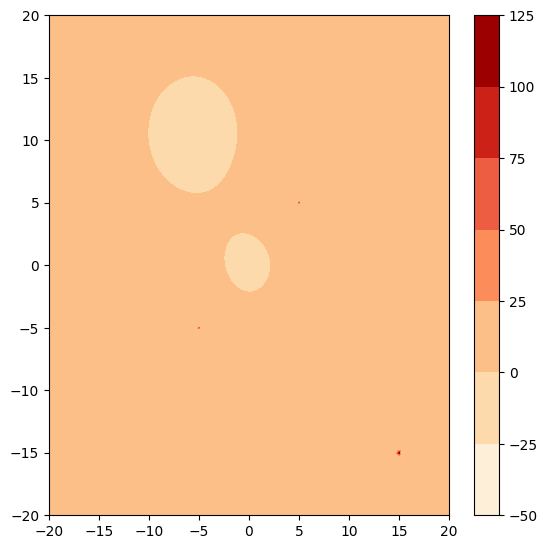

In [ ]:
####################################################
####################################################
####################################################
############### Problema 2, item b #################
####################################################
####################################################
####################################################

import matplotlib.pyplot as plt
def mostrar_potencial(x,y,z,Ex=None,Ey=None):
  WIDTH, HEIGHT, DPI = 500, 500, 100
  fig = plt.figure(figsize=(WIDTH/DPI, HEIGHT/DPI))
  ax = fig.add_subplot()
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

  cmap = plt.get_cmap('OrRd')
  ct = ax.contourf(x,y,z, cmap=cmap)
  fig.colorbar(ct)

  if type(Ex) != type(None) and type(Ey) != type(None):
    color = np.log(np.sqrt(Ex**2 + Ey**2))
    ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.plasma,
                  density=3, arrowstyle='->')

potencial_total = np.zeros(shape=xc.shape)

# complete abaixo:

for carga in cargas:
  potencial_total += ...

mostrar_potencial(x,y,potencial_total)

> *Bonus*: (opcional!)
> 
> Se tudo estiver certo, rode o seguinte código para ver os vetores de campo elétrico.

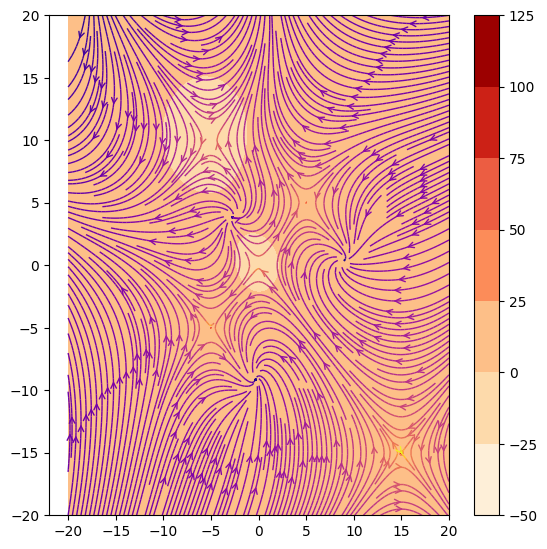

In [ ]:
Ex, Ey = np.gradient(potencial_total)
mostrar_potencial(x,y,potencial_total, Ex,Ey)

---

## Problema 3 (Pacotes `numpy`, `matplotlib` e `scipy`)

Vamos resolver um problema de difração de luz utilizando transformadas de Fourier. 

Considere uma onda se movendo em $z < 0$ com comprimento de onda $\lambda$. O número de onda é dado por $ k = 2\pi/\lambda$.

Essa onda incide em uma placa contendo uma fenda em $z = 0$ e queremos ver o resultado em uma tela posicionada em $z = L$.

Para estimar numericamente o padrão de difração dessa luz, podemos discretizar o sistema e utilizar o pacote `fft` do SciPy.

![](https://rafael-fuente.github.io/images/angular-spectral-method/angular-spectral-method-single-slit-diffraction.png)

Fonte: <https://rafael-fuente.github.io>

Referência: Introduction to Fourier Optics, Joseph Goodman


### Item (a)

Considere que o plano no qual a luz irá incidir seja definido por um retângulo em $-L_x<x<L_x$ e $-L_y < y < L_y$. O eixo $x$ será discretizado em $N_x$ pontos, e o $y$ em $N_y$ pontos.

Vamos considerar:

$L_x = 1400~\mu\text{m}, L_y = 400~\mu\text{m}$, com $N_x = 2500$ e $N_y = 1500$ pontos.

- Defina as variáveis `Lx,Ly,Nx,Ny` com seus respectivos valores.

- Crie as arrays `x` e `y` e um *meshgrid* `xc,yc`.

- Defina array bidimensional com nome `f` com valores iguais a zero, com o mesmo *shape* do *meshgrid* criado.

- Execute o seguinte código para conferência:

```python
print(xc.shape, yc.shape, f.shape)
print(xc.min(), xc.max(), yc.min(), yc.max())
print(f.min(), f.max())
```

> [!IMPORTANT] 
> **Definição do plano**
> 
> Faça em células abaixo a implementação pedida.

In [ ]:
####################################################
####################################################
####################################################
############### Problema 3, item a #################
####################################################
####################################################
####################################################

Lx = 
Ly = 

Nx = 
Ny = 

x = np.linspace(...)
y = np.linspace(...)

xc, yc = np.meshgrid(...)

f = ...

print(xc.shape, yc.shape, f.shape)
print(xc.min(), xc.max(), yc.min(), yc.max())
print(f.min(), f.max())

(1500, 2500) (1500, 2500) (1500, 2500)
-1400.0 1400.0 -400.0 400.0
0.0 0.0


### Item (b)

A função $f(x_{n_x},y_{n_y})$ recebe um valor igual a 1 nas posições da fenda, e 0 onde não há. A variável `f` definida anteriormente representa essa função discretizada.

Na célula abaixo foi definida uma função chamada `criar_fenda(xc,yc,f,x0,y0,R)` para criar fendas circulares. Ela recebe como parâmetro as variáveis `xc,yc,f` definidas acima, e mais 3 argumentos:

- `x0`: posição $x$ do centro da fenda

- `y0`: posição $y$ do centro da fenda

- `R`: raio da fenda

**Faça:**

- Crie um fenda na origem, de raio igual a $22~\mu\text{m}$.

- Utilize o código

```python
ax.imshow(f, extent = [-Lx, Lx, -Ly, Ly], cmap="gray")
```

para mostrar a placa.

- Formate os eixos para seus respectivos nomes e unidades.

*Dica: utilize `ax.set_aspect("equal")` para melhorar a proporção do gráfico.*


> [!IMPORTANT] 
> **Definição da fenda central**
> 
> Faça em células abaixo a implementação pedida.

Text(0, 0.5, '$y~(\\mu\\mathrm{m})$')

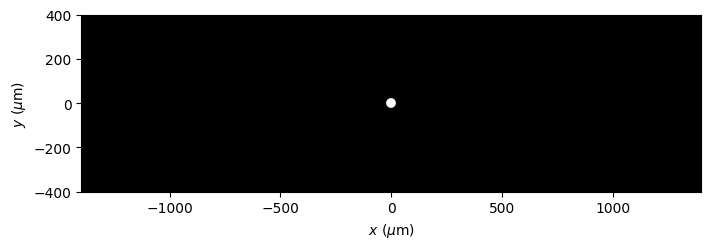

In [ ]:
####################################################
####################################################
####################################################
############### Problema 3, item b #################
####################################################
####################################################
####################################################

def criar_fenda(xc,yc,f,x0,y0,R):
  f[((xc-x0)**2 + (yc-y0)**2 < R**2)] = 1

# complete abaixo

criar_fenda(...)

plt.figure(figsize=(8,6),dpi=100)
ax = plt.gca()
ax.set_aspect("equal")
ax.imshow(f, extent = [-Lx, Lx, -Ly, Ly], cmap="gray")

ax.set_xlabel(...)
ax.set_ylabel(...)

### Item (c)

O resultado da função de onda em $z = L$ pode ser aproximado por uma integral de Fresnel. Após a discretização, precisamos fazer a transformada de Fourier discreta (DFT) da função

$$g(x,y) = f(x,y) e^{\frac{ik}{2L}\left( x^2 + y^2\right)},$$

resultando em

$$\begin{gathered}
  G(x'_{n_x}, y'_{n_y}) = \sum _{n_{x}=0}^{N_{x}-1}\sum _{n_{y}=0}^{N_{y}-1}g(x_{n_{x}},y_{n_{y}})e^{-{i2\pi x'_{n_x}{\frac {n_{x}}{N_{x}}} -{i2\pi y'_{n_y}{\frac {n_{y}}{N_{y}}}}}}.
\end{gathered}$$

O valor de $\left|G(\mu_{x}, \mu_{y})\right|$ nos dá a amplitude nos pontos de observação $(x'_{n_x}, y'_{n_y})$ da tela, dados por

$$\begin{gathered}
x'_{n_x}  = \frac{(n_x - N_{x}/2) L \lambda}{2 L_{x}} \\
y'_{n_y}  = \frac{(n_y - N_{y}/2) L \lambda}{2 L_{y}}
\end{gathered}.$$

Vamos fazer isso de forma eficiente utilizando o pacote `fft` do SciPy.

> [!Warning]
> Não será necessário entender as equações acima para fazer o exercício!

**Faça**:

- Defina variáveis para a distância $L = 5~\text{m} = 5\times 10^6~\mu\text{m}$, comprimento de onda $\lambda = 1.85~\text{nm} = 0.00185~\mu\text{m}$, e número de onda $k = 2\pi/\lambda$.

- Importe o pacote `fft` do SciPy com o nome `spfft`.

- Aplique a função `spfft.fft2` na função $g(x,y)$, que no caso é dada pela multiplicação da variável `f` no item (a) pela exponencial utilizando o resultado do *meshgrid*. Salve o resultado em uma variável chamada `fft_G`.

- Aplique a função `spfft.fftshift` na variável `fft_G`, salvando o resultado como variável `G`. Isso é necessário para centralizar a transformação em torno de $x' = y' = 0$.

- Depois de fazer tudo isso, ajeite o código abaixo para mostrar o gráfico, acrescentando os comandos para indicar os valores dos eixos e a escala de cor para a amplitude. O gráfico de cima mostra a intensidade relativa ao máximo ao longo de $y = 0$, e o de baixo mostra o padrão de difração.

> [!IMPORTANT] 
> **Cálculo da intensidade**
> 
> Faça em células abaixo a implementação pedida.

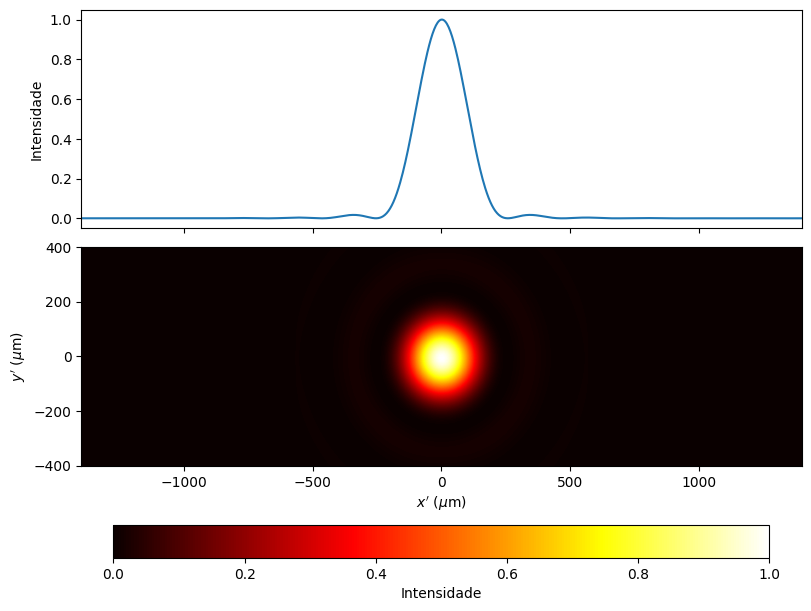

In [ ]:
####################################################
####################################################
####################################################
############### Problema 3, item c #################
####################################################
####################################################
####################################################

L = ...
lb = ...
k = ...

import scipy.fft as spfft

fft_G = spfft.fft2( .... ) # função g da equação
G = spfft.fftshift(fft_G)

# cria o gráfico
fig, ax = plt.subplots(2,1,sharex=True,figsize=(8,6), dpi=100,constrained_layout=True)

Lx_screen = Nx*L*lb/(4*Lx)
Ly_screen = Ny*L*lb/(4*Ly)

abs_G = ...

ax[0].plot(np.linspace(-Lx_screen,Lx_screen, len(abs_G[0])), ...)
ax[0].set_ylabel(r"Intensidade")

grafico = ax[1].imshow(abs_G**2/(abs_G**2).max(), cmap ='hot', extent = [-Lx_screen,Lx_screen,-Ly_screen,Ly_screen], interpolation = "bilinear", aspect="auto")

ax[1].set_xlim(...)
ax[1].set_ylim(...)

ax[1].set_xlabel(...)
ax[1].set_ylabel(...)

fig.colorbar(grafico, orientation="horizontal").set_label("Intensidade")

**Opcional**

Repita tudo o que foi feito acima, agora com duas fendas do mesmo tamanho da anterior, separadas por uma distância $D = 128~\mu\text{m}$ e depois por $D = 500~\mu\text{m}$, em torno da origem.

Não se esqueça de zerar a variável `f` antes de criar as fendas novamente.

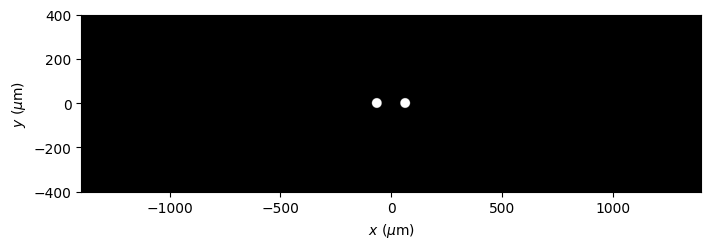

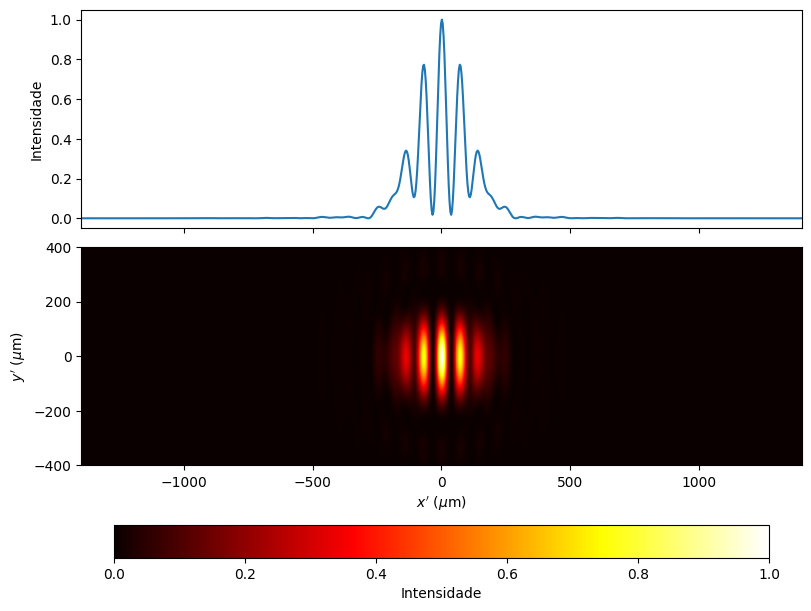

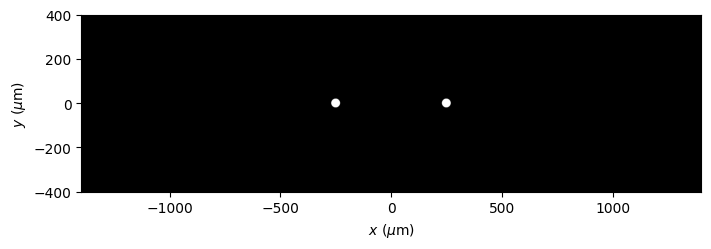

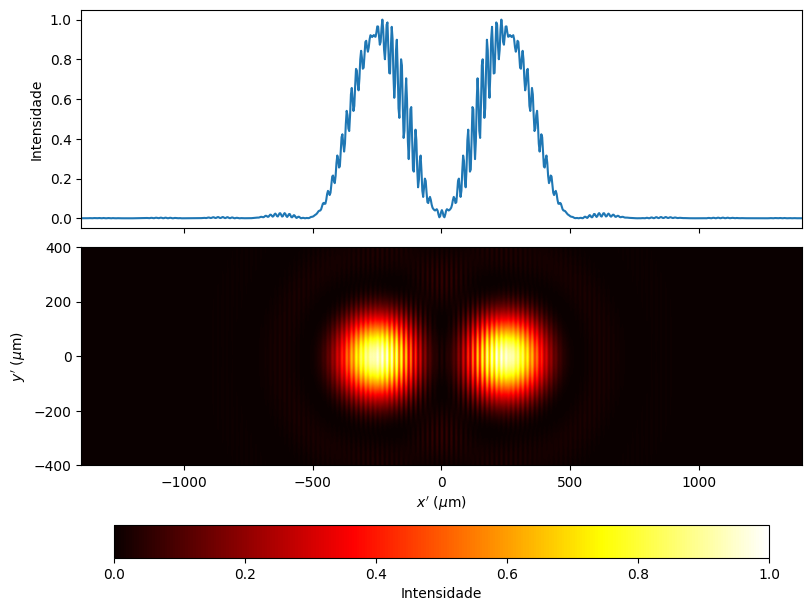

---
## Problema 4 (Pacotes `pandas` e `seaborn`)

**Reproduzindo gráficos de artigo da Nature**

Vamos tentar reproduzir alguns gráficos de um artigo científico publicado na Nature com dados abertos: <https://www.nature.com/articles/s41586-021-03409-2>.

Após o processamento dos dados com o `pandas`, vamos utilizar o `matplotlib` e o `seaborn` para plotar os quatro gráficos da Figura 1 do artigo. A figura é esta:

![](https://i.imgur.com/dgT0WUY.png)

Os dados foram disponibilizados em formato CSV em "Source data": https://www.nature.com/articles/s41586-021-03409-2#Sec13. Existem quatro arquivos, cada um para cada figura e **vamos utilizar apenas o primeiro deles**. No entanto, os dados não estão em um formato completamente adequado. Por exemplo, há colunas em branco separando os dados para cada um dos subgráficos (a,b,c e d).

A tarefa aqui é de filtrar esses dados e fazer os gráficos. Para os gráficos em a. e b., vamos utilizar uma forma de mapear dados em 3D para um grid com uma função do SciPy. Já em c. e d., vamos utilizar o `seaborn` com o que já aprendemos anteriormente. 

O resultado final não será exatamente o mesmo, mas dará uma ideia de como tratar dados científicos com Python.

### Item (a)

O link para o arquivo com os dados da primeira figura é https://static-content.springer.com/esm/art%3A10.1038%2Fs41586-021-03409-2/MediaObjects/41586_2021_3409_MOESM3_ESM.csv.

Esses dados estão separados por TAB, isto é, por um separador especial `\t`. 

- Utilizando a função `read_csv()` do `pandas` com o argumento `sep` adequado, crie um dataframe chamado `df_fig1` a partir do arquivo acima.

**Obs: é normal demorar carregar, pois o arquivo é pesado!** Ele deve conter 432800 linhas e 52 colunas.

> [!IMPORTANT] 
> **Abrir os dados da Figura 1**
> 
> Faça em células abaixo a implementação pedida.

In [ ]:
####################################################
####################################################
####################################################
############### Problema 4, item a #################
####################################################
####################################################
####################################################
import pandas as pd

df_fig1 = pd.read_csv("https://static-content.springer.com/esm/art%3A10.1038%2Fs41586-021-03409-2/MediaObjects/41586_2021_3409_MOESM3_ESM.csv", ...)
df_fig1

,Fig1a,rho_xx,magnetic_field,nu,Unnamed: 4,Fig1b,rho_xx.1,temperature,nu.1,Unnamed: 9,...,vH_4.5K,diff_vH_4.5K,Unnamed: 44,nu.12,vH_8K,diff_vH_8K,Unnamed: 48,nu.13,vH_20K,diff_vH_20K
0,NaN,1.113178e+06,0.0,-3.960483,NaN,NaN,320.729237,0.016000,-4.734486,NaN,...,3.990258,54.766740,NaN,-4.272094,3.942158,54.599892,NaN,-4.272094,3.958963,54.660726
1,NaN,7.737762e+05,0.0,-3.955262,NaN,NaN,312.183598,0.016000,-4.723163,NaN,...,3.984057,54.778701,NaN,-4.265010,3.936336,54.609459,NaN,-4.265010,3.951963,54.656180
2,NaN,6.058442e+05,0.0,-3.950041,NaN,NaN,320.512820,0.016000,-4.711841,NaN,...,3.976844,54.792117,NaN,-4.257926,3.930504,54.619254,NaN,-4.257926,3.944962,54.647409
3,NaN,5.624204e+05,0.0,-3.944820,NaN,NaN,320.242710,0.016000,-4.700518,NaN,...,3.970495,54.806345,NaN,-4.250842,3.923329,54.633460,NaN,-4.250842,3.938274,54.635163
4,NaN,5.105263e+05,0.0,-3.939599,NaN,NaN,345.466801,0.016000,-4.689195,NaN,...,3.963786,54.815686,NaN,-4.243758,3.915217,54.651019,NaN,-4.243758,3.931948,54.617824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432795,NaN,NaN,NaN,NaN,NaN,NaN,438.079191,4.204082,4.267012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432796,NaN,NaN,NaN,NaN,NaN,NaN,421.088092,4.204082,4.278334,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432797,NaN,NaN,NaN,NaN,NaN,NaN,403.768506,4.204082,4.289657,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432798,NaN,NaN,NaN,NaN,NaN,NaN,386.100386,4.204082,4.300980,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Item (b) 

Antes de prosseguir, rode a célula abaixo para definir a função `plotar_heatmap_log(x,y,z,zmin,zmax,zlabel,ax)`. Ela será utilizada para transformar um arquivo com dados *xyz* em um grid apropriado a ser utilizado com a função `imshow()`.

> [!Warning]
> Não esqueça de executar a célula abaixo!

In [ ]:
import seaborn as sns
import scipy.interpolate as spitp
import matplotlib.colors as mplc
sns.set_style("white")

def plotar_heatmap_log(x,y,z,zmin,zmax,zlabel,ax):
  xmin, xmax = x.min(), x.max()
  ymin, ymax = y.min(), y.max()
  
  points = [(xx,yy) for xx,yy in zip(x,y)]

  xx = np.linspace(xmin,xmax,1000)
  yy = np.linspace(ymin,ymax,1000)
  xc, yc = np.meshgrid(xx,yy)
  
  zc = spitp.griddata(points, z, (xc, yc), method='linear')

  cmap = plt.get_cmap('seismic')
  norm = mplc.LogNorm(vmin=zmin,vmax=zmax)

  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  sm.set_array([])

  ax.imshow(zc, extent=(xmin,xmax,ymin,ymax), aspect='auto', origin="lower", norm = norm, cmap=cmap)

  fig = plt.gcf()
  cbar = fig.colorbar(sm,ax=ax)
  cbar.set_label(zlabel)

Agora vamos tentar plotar o gráfico 1a. Vamos utilizar as colunas `rho_xx`, `magnetic_field` e `nu`. 

- Crie um dataframe chamado `df_fig1a` apenas com essas colunas. Utilize `dropna()` para remover quaisquer valores NaN. O resultado final deve ser um dataframe com 3 colunas e 120000 linhas.
- Após fazer isso, chame a função `plotar_heatmap_log` com os parâmetros:

  - `x`: coluna "nu" de `df_fig1a`
  - `y`: coluna "magnetic_field" de `df_fig1a`
  - `z`: coluna "rho_xx" de `df_fig1a`
  - `zmin`: valor $10^2$
  - `zmax`: valor $10^6$
  - `zlabel`: "$\rho_{xx}$"
  - `ax`: Axes atual (`plt.gca()`)

- Depois, defina o eixo x com `ax.set_xlim()` para valores entre -3.5 e 0. Escreva os nomes apropriados nos eixos também:
  - eixo x: "$\nu_0$"
  - eixo y: "$B$"

> [!IMPORTANT] 
> **Fazer o gráfico 1a**
> 
> Faça em células abaixo a implementação pedida.

Text(0, 0.5, '$B$')

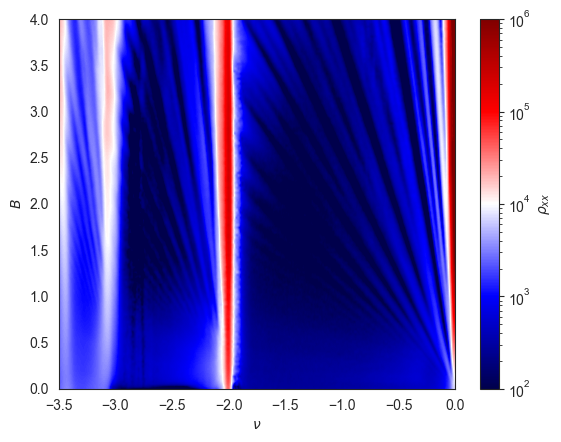

In [ ]:
####################################################
####################################################
####################################################
############### Problema 4, item b #################
####################################################
####################################################
####################################################
df_fig1a = ....dropna()

ax = plt.gca()
plotar_heatmap_log(...)

ax.set_xlim(...)
ax.set_xlabel(...)
ax.set_ylabel(...)

### Item (c)

Agora vamos fazer o gráfico 1b. Vamos utilizar as colunas `rho_xx.1`, `temperature` e `nu.1`. 

- Crie um dataframe chamado `df_fig1b` apenas com essas colunas. Utilize `dropna()` para remover quaisquer valores NaN. 

- Utilizando `df_fig1b.columns = [nome1, nome2, nome3]`, renomeie as colunas para `rho_xx`, `temperature` e `nu`. 
O resultado final deve ser um dataframe com 3 colunas e 432800 linhas.

- Após fazer isso, chame a função `plotar_heatmap_log` com os parâmetros:

  - `x`: coluna "nu" de `df_fig1b`
  - `y`: coluna "temperature" de `df_fig1b`
  - `z`: coluna "rho_xx" de `df_fig1b`
  - `zmin`: valor $10^2$
  - `zmax`: valor $10^6$
  - `zlabel`: "$\rho_{xx}$"
  - `ax`: Axes atual (`plt.gca()`)

- Depois, defina o eixo x com `ax.set_xlim()` para valores entre -3.5 e 0. Escreva os nomes apropriados nos eixos também:
  - eixo x: "$\nu_0$"
  - eixo y: "$T$"


> [!IMPORTANT] 
> **Fazer o gráfico 1b**
> 
> Faça em células abaixo a implementação pedida.

Text(0, 0.5, '$T$')

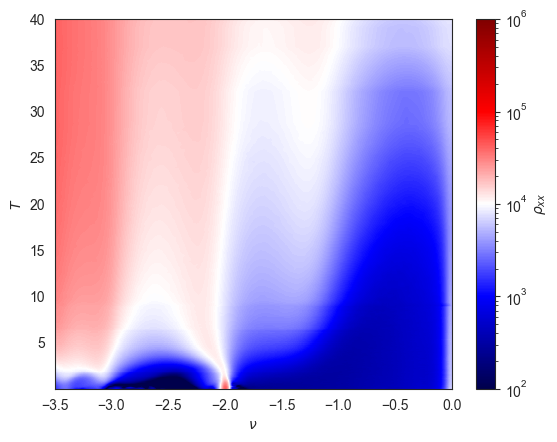

In [ ]:
####################################################
####################################################
####################################################
############### Problema 4, item c #################
####################################################
####################################################
####################################################
df_fig1b = ...
df_fig1b.columns = ...
ax = plt.gca()
plotar_heatmap_log(...)

ax.set_xlim(...)
ax.set_xlabel(...)
ax.set_ylabel(...)

### Item (d)

Para as figuras c e d, o acesso aos dados começa a ficar mais complicado. Como o arquivo CSV não foi bem formatado, temos diferentes colunas de `rho_xx` e `nu` espalhadas. Vamos utilizar os dados referentes às temperaturas 1K, 5K, 10K, 20K, e 40K.

- Crie uma lista de dataframes `df_fig1c`.
- Agora, gere um dataframe chamado `_df` extraindo as colunas `nu.2` e `rho_xx_1K` de `df_fig1`. Acrescente `copy()` ao final para garantir que está apenas copiando os dados.

- Renomeie as colunas de `_df` para `nu` e `rho_xx`, como fizemos antes.

- Depois, crie uma coluna chamada `temperature` com o texto `1K`.

- Finalmente, utilize `df_fig1c = df_fig1c.append(_df.dropna())` para adicionar o dataframe intermediário ao dataframe completo. 

- Agora, repita o procedimento acima para as temperaturas e respectivas colunas, sempre utilizando o `df_fig1c.append()` ao final:

  - 5K: 'nu.4' e 'rho_xx_5K'
  - 10K: 'nu.6' e 'rho_xx_10K'
  - 20K: 'nu.7' e 'rho_xx_20K'
  - 50K: 'nu.8' e 'rho_xx_40K'

No final, o dataframe `df_fig1c = pd.concat(df_fig1c).reset_index()` deve conter 3 colunas e 4000 linhas.

- Utilize a função `sns.lineplot()` para plotar o gráfico de `x="nu"` e `y="rho_xx"` com as cores definidas pela coluna `temperature`. Utilize os parâmetros `data`, `ax` e `hue` apropriados.

- Defina o eixo x para ser entre -3.5 e 0, e o y para ser de 0 até 30000. Escreva os nomes apropriados nos eixos também:
  - eixo x: "$\nu_0$"
  - eixo y: "$\rho_{xx}$"

> [!IMPORTANT] 
> **Fazer o gráfico 1c**
> 
> Faça em células abaixo a implementação pedida.

Text(0, 0.5, '$\\rho_{xx}$')

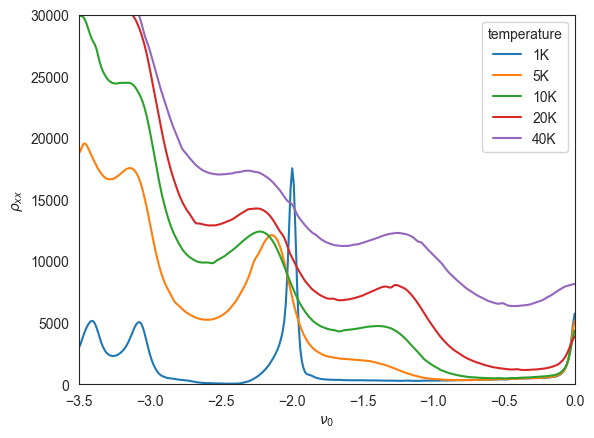

In [ ]:
####################################################
####################################################
####################################################
############### Problema 4, item d #################
####################################################
####################################################
####################################################

df_fig1c = []

#...
# fazer as operações
#...

df_fig1c = pd.concat(df_fig1c).reset_index()

ax = plt.gca()
sns.lineplot(...)

ax.set_xlim(...)
ax.set_ylim(...)
ax.set_xlabel(...)
ax.set_ylabel(...)

### Item (e)

Agora vamos finalmente fazer o gráfico 1d. 

- Para isso, repita todo o procedimento do Item (d) para as seguintes temperaturas e respectivas colunas, criando o dataframe `df_fig1d` de 6000 linhas e com as 3 colunas `nu`, `vH` e `temperature`:

  - 0.5K: 'nu.9' e 'vH_0.5K'
  - 2.5K: 'nu.10' e 'vH_2.5K'
  - 4.5K: 'nu.11' e 'vH_4.5K'
  - 8K: 'nu.12' e 'vH_8K'
  - 20K: 'nu.13' e 'vH_20K'

- Utilize a função `sns.lineplot()` para plotar o gráfico de `x="nu"` e `y="vH"` com as cores definidas pela coluna `temperature`. Utilize os parâmetros `data`, `ax` e `hue` apropriados.

- Defina o eixo x para ser entre -3.5 e 0, e o y para ser de 0 até 3. Escreva os nomes apropriados nos eixos também:
  - eixo x: "$\nu_0$"
  - eixo y: "$\nu_H - \nu_0$"

> [!IMPORTANT] 
> **Fazer o gráfico 1d**
> 
> Faça em células abaixo a implementação pedida.

Text(0, 0.5, '$\\nu_H - \\nu_0$')

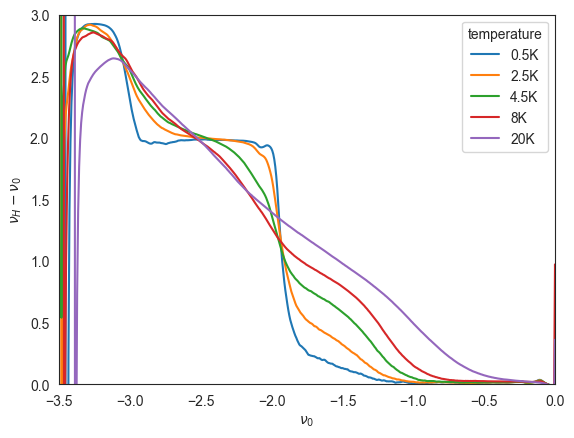

In [ ]:
####################################################
####################################################
####################################################
############### Problema 4, item e #################
####################################################
####################################################
####################################################

df_fig1d = []

#...
# fazer as operações
#...

df_fig1d = pd.concat(df_fig1d).reset_index()

ax = plt.gca()
sns.lineplot(...)

ax.set_xlim(...)
ax.set_ylim(...)
ax.set_xlabel(...)
ax.set_ylabel(...)

**Opcional**

Se der tudo certo, crie um gráfico com `fig, axs = plt.subplots(2,2,figsize=(8,6), dpi=150` e copie os códigos gerados acima, modificando os parâmetros `ax=` das funções para os Axes apropriados. O resultado deverá ser como o seguinte:

*Dica: utilize `fig.tight_layout()` para melhorar o espaçamento entre as figuras.*

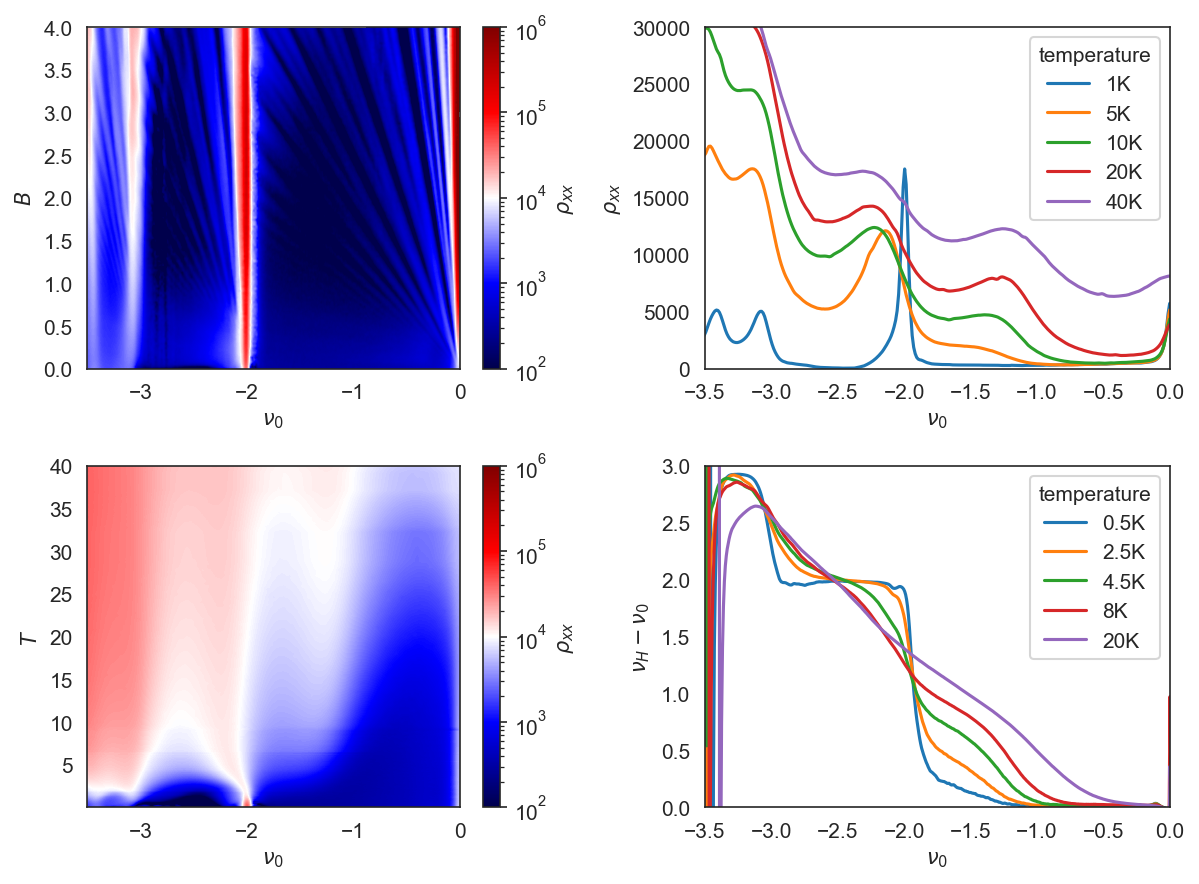